K=1 | CV Accuracy: 0.9333 ± 0.0596
K=3 | CV Accuracy: 0.9467 ± 0.0542
K=5 | CV Accuracy: 0.9733 ± 0.0249
K=7 | CV Accuracy: 0.9600 ± 0.0327
K=9 | CV Accuracy: 0.9467 ± 0.0340
K=11 | CV Accuracy: 0.9600 ± 0.0327
K=13 | CV Accuracy: 0.9533 ± 0.0452
K=15 | CV Accuracy: 0.9533 ± 0.0452
K=17 | CV Accuracy: 0.9533 ± 0.0452
K=19 | CV Accuracy: 0.9533 ± 0.0400
K=21 | CV Accuracy: 0.9600 ± 0.0490
K=23 | CV Accuracy: 0.9600 ± 0.0490
K=25 | CV Accuracy: 0.9200 ± 0.0581
K=27 | CV Accuracy: 0.9333 ± 0.0558
K=29 | CV Accuracy: 0.9067 ± 0.0712

Best K selected: 5
Test Accuracy with K=5: 0.9333


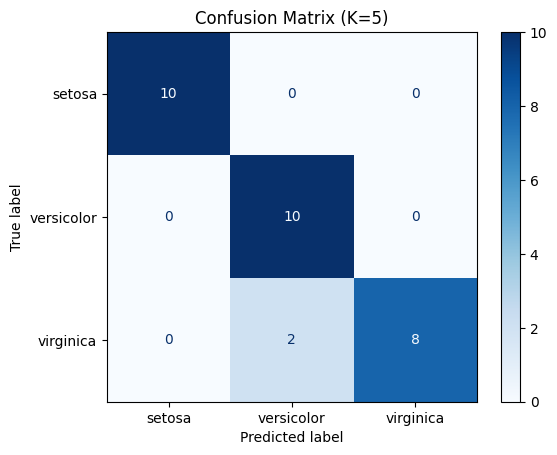

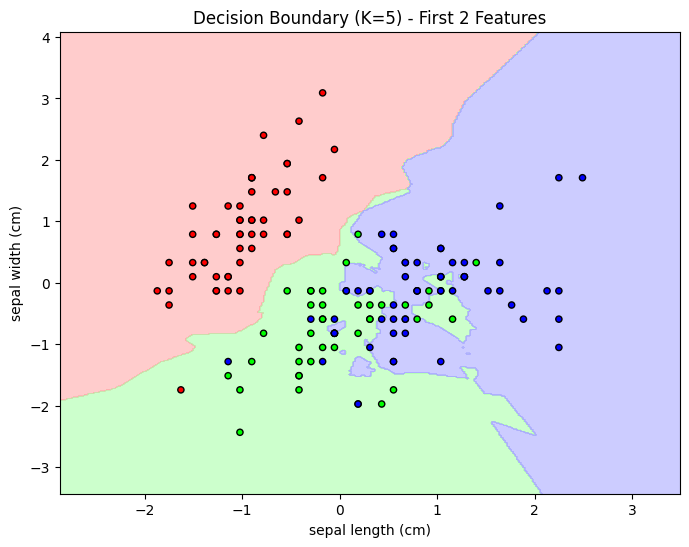

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Define range of K values and cross-validation strategy
k_values = list(range(1, 30, 2))
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate K values using cross-validation
cv_scores = []
for k in k_values:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=k))
    ])
    scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
    cv_scores.append(scores.mean())
    print(f"K={k} | CV Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

# Select best K
best_k = k_values[np.argmax(cv_scores)]
print(f"\nBest K selected: {best_k}")

# Split dataset for final evaluation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train final model
final_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=best_k))
])
final_pipeline.fit(X_train, y_train)

# Evaluate on test set
y_pred = final_pipeline.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print(f"Test Accuracy with K={best_k}: {test_acc:.4f}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix (K={best_k})")
plt.show()

# Visualize decision boundary using 2D projection
def plot_decision_boundary(X, y, model, feature_names, title):
    X_vis = X[:, :2]  # only use first 2 features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_vis)
    model.fit(X_scaled, y)

    h = .02
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.title(title)
    plt.show()

# Plot decision boundary
plot_decision_boundary(
    X, y,
    KNeighborsClassifier(n_neighbors=best_k),
    iris.feature_names,
    f"Decision Boundary (K={best_k}) - First 2 Features"
)
